In [ ]:
# !pip install klib

In [147]:
import pandas as pd
import klib
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

In [148]:
# 구글코랩에서 작업할때
# from google.colab import drive
# drive.mount('/content/drive')
# path = "/content/drive/MyDrive/회귀분석/"
# data = pd.read_csv(path + "Hn19_all.csv", encoding = 'cp949')

In [149]:
data = pd.read_csv("Hn19_all.csv", encoding = 'cp949')
df = data[["ID","age","BE3_86", "BE3_87", "BE3_88", "BE3_76","BE3_77","BE3_78","DI1_dg","DI2_dg","DI3_dg","DI4_dg","DE1_dg","DF2_dg","BO1","region","sex","ho_incm5"]]

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (105,311,327,378,397,503,512,515,528,539) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 이상치처리

In [150]:
# 20세에서 69세 사이로 표본 맞추기
df_all = df.query("20<=age<=39")
display(df_all)

,ID,age,BE3_86,BE3_87,BE3_88,BE3_76,BE3_77,BE3_78,DI1_dg,DI2_dg,DI3_dg,DI4_dg,DE1_dg,DF2_dg,BO1,region,sex,ho_incm5
1,A501215303,28,8.0,88.0,88.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2.0
11,A501235703,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,3.0
25,A501308801,29,8.0,88.0,88.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,2,3.0
26,A501308802,32,8.0,88.0,88.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,1,3.0
31,A501317302,22,2.0,0.0,15.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8090,R504361501,38,8.0,88.0,88.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8,2,5.0
8093,R504363202,38,2.0,0.0,20.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8,2,3.0
8098,R504368303,24,8.0,88.0,88.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8,2,3.0
8099,R504370001,26,8.0,88.0,88.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8,2,4.0


In [151]:
print("연령대에 벗어난 인원은" , len(data)- len(df_all),"명입니다")

연령대에 벗어난 인원은 6376 명입니다


In [152]:
klib.missingval_plot(df_all)

In [153]:
#종속변수의 정보가 없는 id 확인
print(df_all.isnull().sum())
print(df_all.shape)

ID            0
age           0
BE3_86      113
BE3_87      113
BE3_88      113
BE3_76      113
BE3_77      113
BE3_78      113
DI1_dg      113
DI2_dg      113
DI3_dg      113
DI4_dg      186
DE1_dg      113
DF2_dg      113
BO1         113
region        0
sex           0
ho_incm5      8
dtype: int64
(1734, 18)


In [154]:
#y에 해당하는 변수들 중 null이 있을 시 제거
print("종속변수에 결측치가 있어 제거한 인원은", df_all.BE3_86.isnull().sum(), "명입니다")
df_all = df_all.dropna(subset=["BE3_86", "BE3_87", "BE3_88", "BE3_76","BE3_77","BE3_78"])

# y에 해당하는 변수들 중 중강도 + 고강도 운동 비해당자와 무응답자 확인
data_drop = df_all.query("BE3_86 ==8.0 & BE3_87 ==88.0 & BE3_88 ==88.0 & BE3_76 ==8.0 & BE3_77 ==88.0 & BE3_78 ==88.0")
# len(data_drop)
# 모름이면 삭제
data_drop_2 = df_all.query("BE3_86 ==9.0 | BE3_87 ==99.0 | BE3_88 ==99.0 | BE3_76 ==9.0 | BE3_77 ==99.0 | BE3_78 ==99.0")
# len(data_drop2)

print("종속변수에 해당하는 변수 들 중 무응답자 및 모름이라 답하여 제거한 인원은", len(data_drop)+len(data_drop_2), "명입니다.")

종속변수에 결측치가 있어 제거한 인원은 113 명입니다
종속변수에 해당하는 변수 들 중 무응답자 및 모름이라 답하여 제거한 인원은 1032 명입니다.


In [155]:
df_all = df_all.set_index("ID")
drop_idx=data_drop.set_index("ID").index
df_all.drop(drop_idx,inplace=True)
drop_idx=data_drop_2.set_index("ID").index
df_all.drop(drop_idx,inplace=True)

In [156]:
df_all = df_all.reset_index(); df_all

,ID,age,BE3_86,BE3_87,BE3_88,BE3_76,BE3_77,BE3_78,DI1_dg,DI2_dg,DI3_dg,DI4_dg,DE1_dg,DF2_dg,BO1,region,sex,ho_incm5
0,A501317302,22,2.0,0.0,15.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,2,3.0
1,A502336001,30,1.0,1.0,0.0,1.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,2,5.0
2,A502347901,27,3.0,1.0,0.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,2,3.0
3,A502351301,31,3.0,0.0,40.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1,1,5.0
4,A502378501,38,3.0,0.0,40.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,R504235701,39,4.0,1.0,0.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8,2,3.0
585,R504240804,26,8.0,88.0,88.0,2.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8,2,5.0
586,R504240805,22,3.0,0.0,30.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8,1,5.0
587,R504358101,39,8.0,88.0,88.0,2.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8,1,4.0


In [157]:
df_all.isnull().sum()

ID          0
age         0
BE3_86      0
BE3_87      0
BE3_88      0
BE3_76      0
BE3_77      0
BE3_78      0
DI1_dg      0
DI2_dg      0
DI3_dg      0
DI4_dg      0
DE1_dg      0
DF2_dg      0
BO1         0
region      0
sex         0
ho_incm5    2
dtype: int64

In [158]:
#결측값이 남아있는 '소득' 탐색
df_all.query("ho_incm5!=ho_incm5")
# print("독립변수인 '소득'에 결측치가 있어 제거한 인원은", len(df_all.query("ho_incm5!=ho_incm5")), "명입니다")
# 5명 밖에 되지 않기 때문에 이 사람들 제거
df_all = df_all[df_all.ID != 'A524252703']
df_all = df_all[df_all.ID != 'H502191504']



In [159]:
df_all= df_all.set_index("ID");df_all

,age,BE3_86,BE3_87,BE3_88,BE3_76,BE3_77,BE3_78,DI1_dg,DI2_dg,DI3_dg,DI4_dg,DE1_dg,DF2_dg,BO1,region,sex,ho_incm5
ID,,,,,,,,,,,,,,,,,
A501317302,22,2.0,0.0,15.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,2,3.0
A502336001,30,1.0,1.0,0.0,1.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,2,5.0
A502347901,27,3.0,1.0,0.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,2,3.0
A502351301,31,3.0,0.0,40.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1,1,5.0
A502378501,38,3.0,0.0,40.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R504235701,39,4.0,1.0,0.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8,2,3.0
R504240804,26,8.0,88.0,88.0,2.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8,2,5.0
R504240805,22,3.0,0.0,30.0,8.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8,1,5.0


In [160]:
#답변을 이상하게 한 사람 있는지 확인
print(df_all.BE3_86.unique())
print(df_all.BE3_87.unique())
print(df_all.BE3_88.unique())
print(df_all.BE3_76.unique())
print(df_all.BE3_77.unique())
print(df_all.BE3_78.unique())

[2. 1. 3. 6. 4. 8. 5. 7.]
[ 0.  1. 88.  2.  3.]
[15.  0. 40. 20. 30. 10. 88. 50. 45. 25.]
[8. 1. 6. 2. 3. 4. 5. 7.]
[88.  0.  1.  2.  4.  3.]
[88. 30.  0. 20. 10. 40. 50. 15. 35. 45. 25.]


In [161]:
df_all = df_all.replace({'BE3_86': 8.0}, {'BE3_86': 0.0})
df_all =df_all.replace({'BE3_87': 88.0}, {'BE3_87': 0.0})
df_all =df_all.replace({'BE3_88': 88.0}, {'BE3_88': 0.0})
df_all =df_all.replace({'BE3_76': 8.0}, {'BE3_76': 0.0})
df_all =df_all.replace({'BE3_77': 88.0}, {'BE3_77': 0.0})
df_all =df_all.replace({'BE3_78': 88.0}, {'BE3_78': 0.0})

In [162]:
df_all["운동량"] = ((df_all["BE3_86"] * ((60 * df_all["BE3_87"]) + df_all["BE3_88"])) + (df_all["BE3_76"] * ((60 * df_all["BE3_77"]) + df_all["BE3_78"])))

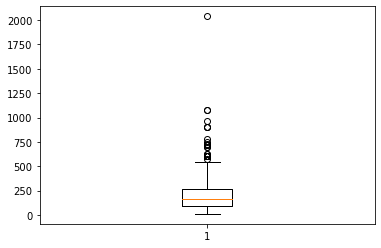

In [163]:
# Basic box plot
plt.boxplot(df_all['운동량'])
plt.show()

In [164]:
#이상치 제거할사람
df_all.reset_index(inplace=True)
df_all.query("ID == 'A535228901'")
print("이상치에 해당하여 제거한 인원은 1명입니다")
df_all = df_all[df_all.ID != 'A535228901']

이상치에 해당하여 제거한 인원은 1명입니다


In [165]:
#gender label encoding
gender= []
for v in df_all["sex"] :
    if v in [1]:
        gender.append(0)
    else:
        gender.append(1)
df_all["gender"] = gender

df_all.drop(columns = ["sex"],inplace=True)
df_all["female"] =df_all["gender"] 
df_all.drop(columns = ["gender"],inplace=True)

In [166]:
#region label encoding
region= []
for v in df_all["region"] :
    if v in [1,9]:
        region.append(0)
    elif v in [2,3,4,5,6,7]:
        region.append(1)
    else :
        region.append(2)

df_all["region"] = region

In [167]:
df_all = df_all.drop(columns = ["BE3_86", "BE3_87", "BE3_88", "BE3_76","BE3_77","BE3_78"],axis=1)

In [168]:
df_all.isnull().sum()

ID          0
age         0
DI1_dg      0
DI2_dg      0
DI3_dg      0
DI4_dg      0
DE1_dg      0
DF2_dg      0
BO1         0
region      0
ho_incm5    0
운동량         0
female      0
dtype: int64

In [169]:
#심혈관질환
x1_df = df_all.iloc[:,:7]; x1_df

,ID,age,DI1_dg,DI2_dg,DI3_dg,DI4_dg,DE1_dg
0,A501317302,22,0.0,0.0,0.0,0.0,0.0
1,A502336001,30,0.0,0.0,0.0,0.0,0.0
2,A502347901,27,0.0,0.0,0.0,0.0,0.0
3,A502351301,31,0.0,0.0,0.0,0.0,0.0
4,A502378501,38,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
582,R504235701,39,0.0,0.0,0.0,0.0,0.0
583,R504240804,26,0.0,0.0,0.0,0.0,0.0
584,R504240805,22,0.0,0.0,0.0,0.0,0.0
585,R504358101,39,0.0,0.0,0.0,0.0,0.0


In [170]:
# 진단 여부에 삭제할 항목이 있는지 확인
print(x1_df.DI1_dg.unique())
print(x1_df.DI2_dg.unique())
print(x1_df.DI3_dg.unique())
print(x1_df.DI4_dg.unique())
print(x1_df.DE1_dg.unique())
# 모두 진단 받은적 있음, 혹은 없음 으로 확인됨 -> 삭제할 id 없음

[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]


In [171]:
x1_df.query("DI1_dg == 0.0 &DI2_dg == 0.0 &DI3_dg == 0.0 &DI4_dg == 0.0 &DE1_dg == 0.0").DI2_dg.unique()

array([0.])

In [172]:
#심혈관질환에 해당하지 않는 (0) ID저장
print(x1_df.query("DI1_dg == 0.0 &DI2_dg == 0.0 &DI3_dg == 0.0 &DI4_dg == 0.0 &DE1_dg == 0.0 ").ID.unique())
x1_df["심혈관질환"] = 1

#심혈관질환에 해당하지 않는 유저들의 심혈관질환 값 0으로 변경
for i in x1_df.query("DI1_dg == 0.0 & DI2_dg == 0.0 & DI3_dg == 0.0 & DI4_dg == 0.0 & DE1_dg == 0.0 ").ID.index:
    x1_df.loc[i, "심혈관질환"] = x1_df.loc[i, "DI2_dg"]

['A501317302' 'A502336001' 'A502347901' 'A502351301' 'A502378501'
 'A502378502' 'A503208502' 'A503213602' 'A503217003' 'A503223801'
 'A503223802' 'A503228901' 'A503230601' 'A503230602' 'A503361503'
 'A504358101' 'A504407402' 'A504419301' 'A504419302' 'A505223803'
 'A505288401' 'A505291802' 'A505320701' 'A506252702' 'A506257803'
 'A506257804' 'A506266303' 'A506319003' 'A506334302' 'A507223803'
 'A507225503' 'A507227203' 'A507293503' 'A507293504' 'A508344504'
 'A508346202' 'A508361501' 'A509213602' 'A509237401' 'A509237402'
 'A509302002' 'A510196603' 'A510200001' 'A510308803' 'A510320702'
 'A510336004' 'A511200001' 'A511257803' 'A511259503' 'A512218703'
 'A512330901' 'A512330902' 'A512341103' 'A513281603' 'A514205102'
 'A514220402' 'A514290101' 'A514293501' 'A514302005' 'A515201703'
 'A515213602' 'A515290104' 'A515296903' 'A516213601' 'A516217002'
 'A516232303' 'A516235702' 'A516276501' 'A516276502' 'A516281602'
 'A516298602' 'A516300302' 'A516303701' 'A517188101' 'A517189801'
 'A5171949

In [173]:
x1_df.심혈관질환.unique()

array([0., 1.])

In [175]:
df_all = pd.concat([df_all,x1_df["심혈관질환"]], axis=1)
df_all = df_all.drop(columns= ["DI1_dg","DI2_dg","DI3_dg","DI4_dg","DE1_dg"],axis=1);
df_all

,ID,age,DF2_dg,BO1,region,ho_incm5,운동량,female,심혈관질환
0,A501317302,22,0.0,4.0,0,3.0,30.0,1,0.0
1,A502336001,30,0.0,3.0,0,5.0,90.0,1,0.0
2,A502347901,27,0.0,3.0,0,3.0,180.0,1,0.0
3,A502351301,31,0.0,5.0,0,5.0,120.0,0,0.0
4,A502378501,38,0.0,4.0,0,4.0,120.0,0,0.0
...,...,...,...,...,...,...,...,...,...
582,R504235701,39,0.0,3.0,2,3.0,240.0,1,0.0
583,R504240804,26,0.0,4.0,2,5.0,50.0,1,0.0
584,R504240805,22,0.0,3.0,2,5.0,90.0,0,0.0
585,R504358101,39,0.0,4.0,2,4.0,30.0,0,0.0


In [176]:
#정신질환
x2_df = df_all.iloc[:,:3]; x2_df

,ID,age,DF2_dg
0,A501317302,22,0.0
1,A502336001,30,0.0
2,A502347901,27,0.0
3,A502351301,31,0.0
4,A502378501,38,0.0
...,...,...,...
582,R504235701,39,0.0
583,R504240804,26,0.0
584,R504240805,22,0.0
585,R504358101,39,0.0


In [177]:
# 진단 여부에 삭제할 항목이 있는지 확인
print(x2_df.DF2_dg.unique())
# 모두 진단 받은적 있음, 혹은 없음 으로 확인됨 -> 삭제할 id 없음
df_all["정신질환"] =df_all["DF2_dg"]
df_all = df_all.drop(columns= ["DF2_dg"],axis=1);df_all

[0. 1.]


,ID,age,BO1,region,ho_incm5,운동량,female,심혈관질환,정신질환
0,A501317302,22,4.0,0,3.0,30.0,1,0.0,0.0
1,A502336001,30,3.0,0,5.0,90.0,1,0.0,0.0
2,A502347901,27,3.0,0,3.0,180.0,1,0.0,0.0
3,A502351301,31,5.0,0,5.0,120.0,0,0.0,0.0
4,A502378501,38,4.0,0,4.0,120.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
582,R504235701,39,3.0,2,3.0,240.0,1,0.0,0.0
583,R504240804,26,4.0,2,5.0,50.0,1,0.0,0.0
584,R504240805,22,3.0,2,5.0,90.0,0,0.0,0.0
585,R504358101,39,4.0,2,4.0,30.0,0,0.0,0.0


In [178]:
# 체형인식에 삭제할 항목이 있는지 확인
print(df_all.BO1.unique())
# 모름 으로 응답한 사람 지우기
df_all.query("BO1 == '9'")
df_all = df_all[df_all.ID != 'A521256103']

[4. 3. 5. 1. 2. 9.]


In [179]:
df_all = df_all.reset_index().drop(columns = ["index"])

In [180]:
# #region dummy
d = {"region"+str(i):[] for i in range(2)}
for i in df_all["region"]:
    temp = list(bin(i)[2:].zfill(2))
    for i in range(2):
        d["region"+str(i)].append(temp[i])

region_df = pd.DataFrame(d)
region_df
df_all=pd.concat([df_all,region_df],axis=1)

In [181]:
df_all.ID.nunique()

585

In [183]:
df_all = df_all.rename({"region0" : "기타지역", "region1" : "광역시", "BO1" : "주관적 체형인식", "ho_incm5": "가구소득"},axis=1)
df_all = df_all.drop(columns = ["region"])

In [185]:
# 심혈관질환	정신질환	수도권거주인수	광역시거주인수	기타지역거주인수
df_count=pd.DataFrame({"심혈관질환" : int(df_all.심혈관질환.sum()), "정신질환" : int(df_all.정신질환.sum()),
              "수도권거주인수" : df_all.query("기타지역 == '0' & 광역시 =='0'")["운동량"].count(),
              "광역시거주인수" : df_all.query("기타지역 == '0' & 광역시 =='1'")["운동량"].count(),
              "기타지역거주인수" :df_all.query("기타지역 == '1' & 광역시 =='0'")["운동량"].count()}, index = ['인원수(명)'])
df_count

,심혈관질환,정신질환,수도권거주인수,광역시거주인수,기타지역거주인수
인원수(명),24,16,306,132,147


In [186]:
df_count_body=pd.DataFrame(df_all.groupby("주관적 체형인식").ID.size());display(df_count_body)
df_count_income = pd.DataFrame(df_all.groupby("가구소득").ID.size());display(df_count_income)
df_count_gender=pd.DataFrame(df_all.groupby("female").ID.size());display(df_count_gender)

,ID
주관적 체형인식,
1.0,14
2.0,70
3.0,241
4.0,199
5.0,61


,ID
가구소득,
1.0,26
2.0,50
3.0,116
4.0,158
5.0,235


,ID
female,
0,348
1,237


In [187]:
allcount=df_all.ID.nunique()
df_ratio = pd.DataFrame()
df_ratio_body= pd.DataFrame()
df_ratio_gender= pd.DataFrame()
df_ratio_income= pd.DataFrame()

# for col in list(df1.columns):
#     df_ratio[col+"비율"]=df1[col]/allcount

for col in list(df_count_body.columns) :
    df_ratio_body[col+"비율"]=df_count_body[col]/allcount

for col in list(df_count_income.columns) :
    df_ratio_income[col+"비율"]=df_count_income[col]/allcount

for col in list(df_count_gender.columns) :
    df_ratio_gender[col+"비율"]=df_count_gender[col]/allcount

display(df_ratio_gender)
display(df_ratio_income)
display(df_ratio_body)



,ID비율
female,
0,0.594872
1,0.405128


,ID비율
가구소득,
1.0,0.044444
2.0,0.085470
3.0,0.198291
4.0,0.270085
5.0,0.401709


,ID비율
주관적 체형인식,
1.0,0.023932
2.0,0.119658
3.0,0.411966
4.0,0.340171
5.0,0.104274


In [208]:
allcount

585

In [188]:
allcount=df_all.ID.nunique()
df_ratio = pd.DataFrame()

for col in list(df_count.columns):
    df_ratio[col+"비율"]=df_count[col]/allcount

display(df_ratio)

,심혈관질환비율,정신질환비율,수도권거주인수비율,광역시거주인수비율,기타지역거주인수비율
인원수(명),0.041026,0.02735,0.523077,0.225641,0.251282


In [189]:
df_all.drop(columns = ["ID"],inplace=True)
df_all = df_all[["운동량","심혈관질환","정신질환","주관적 체형인식","기타지역","광역시","female","가구소득"]]

In [191]:
df_all["운동량"] = df_all["운동량"]/60

<ipython-input-191-a7904d2cf541>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["운동량"] = df_all["운동량"]/60


In [194]:
df_all.to_csv("finalfinal_dfyoung(2).csv", index= False)

In [193]:
#운동량 평균
df_all.운동량.mean()

3.4099715099715113

In [195]:
df_all.query("female==1").운동량.mean()

2.9711673699015466

In [196]:
df_all.query("female==0").운동량.mean()

3.7088122605363987

In [199]:
print(df_all.query("심혈관질환 ==1.0").운동량.mean())
print(df_all.query("심혈관질환 ==0.0").운동량.mean())

3.548611111111111
3.4040404040404058


In [200]:
print(df_all.query("정신질환 ==1.0").운동량.mean())
print(df_all.query("정신질환 ==0.0").운동량.mean())

2.2656249999999996
3.4421499707088477


In [201]:
print(df_all[df_all["주관적 체형인식"]==1.0].운동량.mean())
print(df_all[df_all["주관적 체형인식"]==2.0].운동량.mean())
print(df_all[df_all["주관적 체형인식"]==3.0].운동량.mean())
print(df_all[df_all["주관적 체형인식"]==4.0].운동량.mean())
print(df_all[df_all["주관적 체형인식"]==5.0].운동량.mean())

3.0595238095238093
3.0738095238095235
3.498616874135546
3.489530988274707
3.2663934426229506


In [202]:
print(df_all.query("기타지역 =='0'and 광역시 =='0'").운동량.mean())
print(df_all.query("기타지역 =='1'and 광역시 =='0'").운동량.mean())
print(df_all.query("기타지역 =='0'and 광역시 =='1'").운동량.mean())

3.0974945533769063
3.617346938775509
3.90340909090909


In [203]:
print(df_all[df_all["가구소득"]==1.0].운동량.mean())
print(df_all[df_all["가구소득"]==2.0].운동량.mean())
print(df_all[df_all["가구소득"]==3.0].운동량.mean())
print(df_all[df_all["가구소득"]==4.0].운동량.mean())
print(df_all[df_all["가구소득"]==5.0].운동량.mean())

4.176282051282052
3.56
3.0007183908045985
3.3670886075949373
3.5241134751773053
